In [67]:
import numpy as np 
import matplotlib.pyplot as plt
import os

data_70_nominal = np.load("MVP_Nominal/interpolated_70_nominal/interpolated_combined.npy")
data_80_nominal = np.load("MVP_Nominal/interpolated_80_nominal/interpolated_combined.npy")
data_90_nominal = np.load("MVP_Nominal/interpolated_90_nominal/interpolated_combined.npy")

# high mdot:
data_80_high_mdot = np.load("MVP_High_Mdot/interpolated_80_high_mdot/interpolated_combined.npy")
data_90_high_mdot = np.load("MVP_High_Mdot/interpolated_90_high_mdot/interpolated_combined.npy")
data_100_high_mdot = np.load("MVP_High_Mdot/interpolated_100_high_mdot/interpolated_combined.npy")  
data_110_high_mdot = np.load("MVP_High_Mdot/interpolated_110_high_mdot/interpolated_combined.npy")

# grid_points = np.load(os.path.join("../high_fidelity_sim_data", "cylindrical_grid.npy"), allow_pickle=True).item()
grid_points = np.load(os.path.join("../high_fidelity_sim_data", "cylindrical_grid_repo.npy"), allow_pickle=True).item()

In [69]:
print(data_70_nominal.shape, data_80_nominal.shape, data_90_nominal.shape)
print(" high mdot shapes: ", data_80_high_mdot.shape, data_90_high_mdot.shape, data_100_high_mdot.shape, data_110_high_mdot.shape)
print(grid_points['X_grid'].shape, grid_points['Y_grid'].shape, grid_points['Z_grid'].shape)
print("shape of first snapshot: "  , data_70_nominal[0,: ].shape)

print("shape of grid_points: ", grid_points['X_grid'].shape)
print(" keys in grid_points: ", grid_points.keys())


(195, 189000) (193, 189000) (159, 189000)
 high mdot shapes:  (105, 189000) (178, 189000) (191, 189000) (175, 189000)
(189000,) (189000,) (189000,)
shape of first snapshot:  (189000,)
shape of grid_points:  (189000,)
 keys in grid_points:  dict_keys(['X_grid', 'Y_grid', 'Z_grid', 'r_axis', 'phi_axis', 'h_axis'])


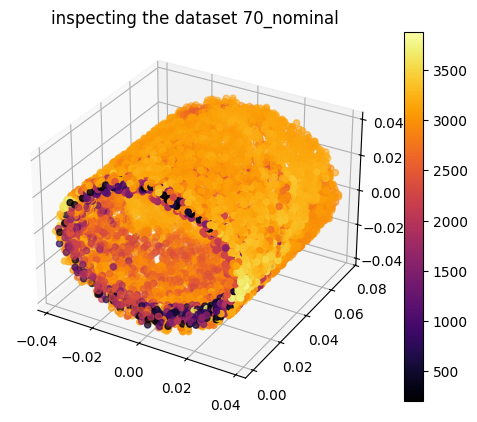

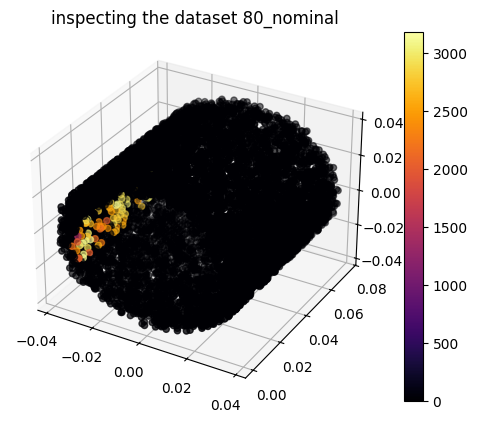

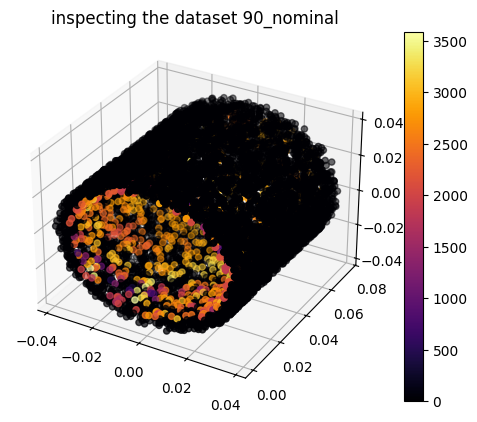

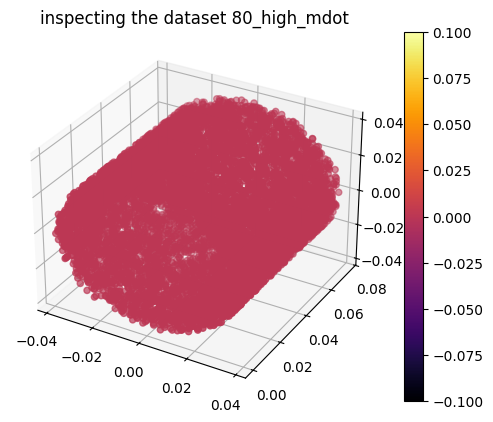

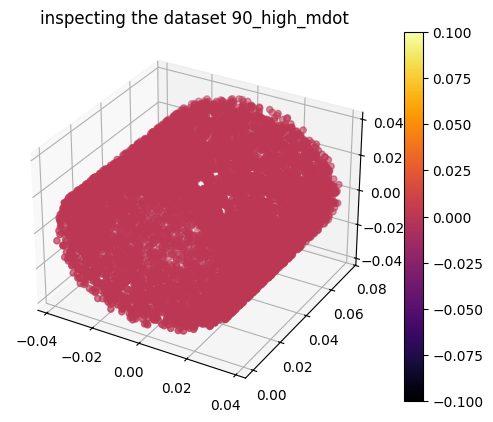

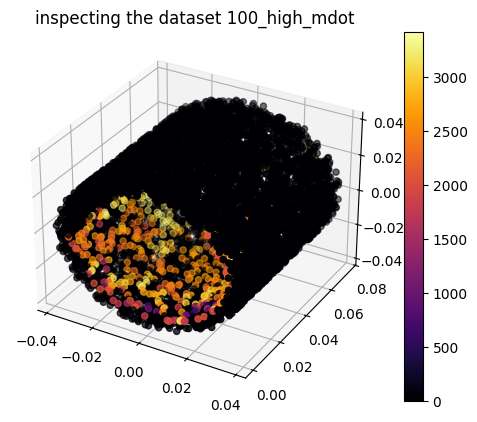

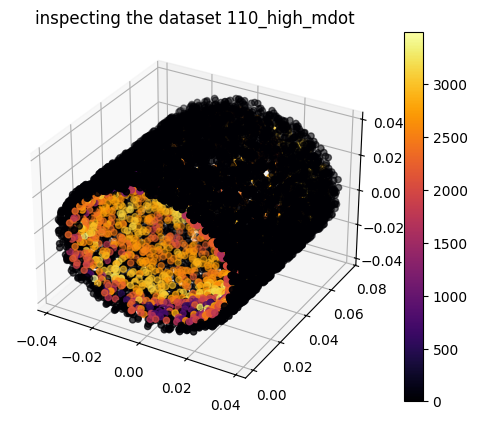

In [94]:
def plot_3d_scatter(X, Y, Z, field, title="3D Scatter Plot"):
    # assert that X, Y, Z, and field have the same length
    assert X.shape[0] == Y.shape[0] == Z.shape[0] == field.shape[0], "X, Y, Z, and field must have the same number of points" 
    
    n_to_plot = min(10000, X.shape[0])  # limit number of points to plot for clarity
    # subsample randomly
    indices = np.random.choice(X.shape[0], n_to_plot, replace=False)
    X = X[indices]
    Y = Y[indices]
    Z = Z[indices]
    field = field[indices]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X, Y, Z, c=field, cmap='inferno')
    plt.colorbar(sc)
    ax.set_title(title)
    plt.show()


first_time_slice = data_70_nominal[0,: ]  # (n_grid_points, time_index=0)
plot_3d_scatter(grid_points['X_grid'],
                grid_points['Y_grid'],
                grid_points['Z_grid'],
                first_time_slice, title="inspecting the dataset 70_nominal")

first_time_slice = data_80_nominal[0,: ]  # (n_grid_points, time_index=0)
plot_3d_scatter(grid_points['X_grid'], 
                grid_points['Y_grid'],
                grid_points['Z_grid'],
                first_time_slice, title="inspecting the dataset 80_nominal")

first_time_slice = data_90_nominal[0,: ]  # (n_grid_points, time_index=0)
plot_3d_scatter(grid_points['X_grid'],
                grid_points['Y_grid'], 
                grid_points['Z_grid'], 
                first_time_slice, title="inspecting the dataset 90_nominal")

# ==== inspecting the high mdot datasets ====
first_time_slice = data_80_high_mdot[100,: ]  # (n_grid_points, time_index=0)
plot_3d_scatter(grid_points['X_grid'], grid_points['Y_grid'], grid_points['Z_grid'], first_time_slice, title="inspecting the dataset 80_high_mdot")
first_time_slice = data_90_high_mdot[60,: ]  # (n_grid_points, time_index=0)
plot_3d_scatter(grid_points['X_grid'], grid_points['Y_grid'], grid_points['Z_grid'], first_time_slice, title="inspecting the dataset 90_high_mdot")
first_time_slice = data_100_high_mdot[0,: ]  # (n_grid_points, time_index=0)        
plot_3d_scatter(grid_points['X_grid'], grid_points['Y_grid'], grid_points['Z_grid'], first_time_slice, title="inspecting the dataset 100_high_mdot")
first_time_slice = data_110_high_mdot[0,: ]  # (n_grid_points, time_index=0)
plot_3d_scatter(grid_points['X_grid'], grid_points['Y_grid'], grid_points['Z_grid'], first_time_slice, title="inspecting the dataset 110_high_mdot")
